In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [2]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
#!pip install sklearn

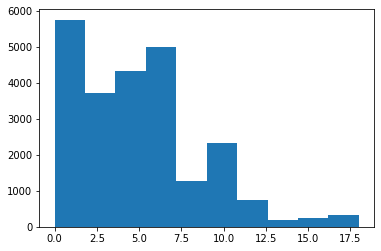

In [5]:
import matplotlib.pyplot as plt
plt.hist(train["X_7"])
plt.show()

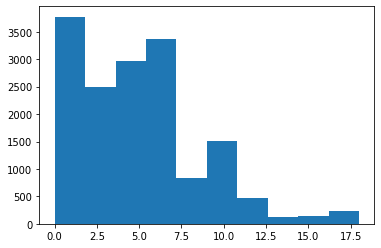

In [6]:
import matplotlib.pyplot as plt
plt.hist(test["X_7"])
plt.show()

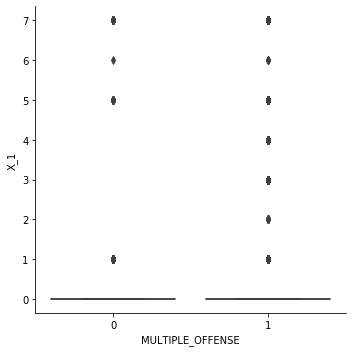

In [7]:
import seaborn as sns
sns.catplot(x="MULTIPLE_OFFENSE", y="X_1", kind="box", data=train);

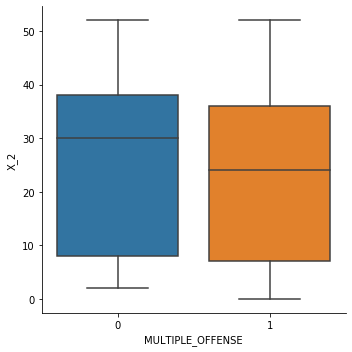

In [8]:
sns.catplot(x="MULTIPLE_OFFENSE", y="X_2", kind="box", data=train);

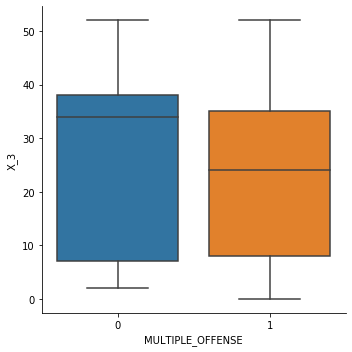

In [9]:
sns.catplot(x="MULTIPLE_OFFENSE", y="X_3", kind="box", data=train);

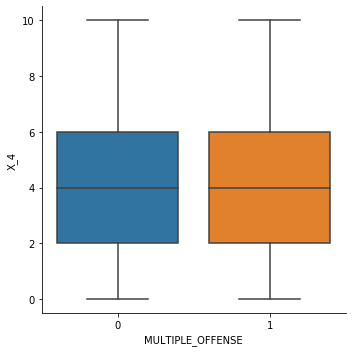

In [10]:
sns.catplot(x="MULTIPLE_OFFENSE", y="X_4", kind="box", data=train)

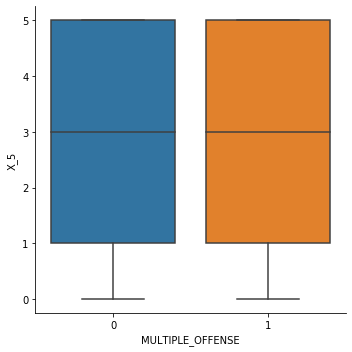

In [11]:
sns.catplot(x="MULTIPLE_OFFENSE", y="X_5", kind="box", data=train)

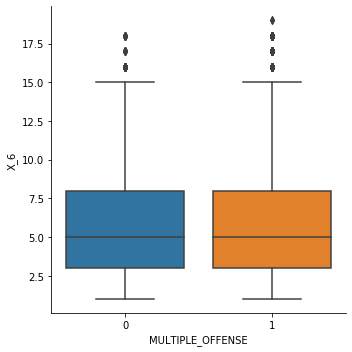

In [12]:
sns.catplot(x="MULTIPLE_OFFENSE", y="X_6", kind="box", data=train)

In [14]:
#sns.catplot(x="MULTIPLE_OFFENSE", y="X_10", kind="swarm", data=train)

In [ ]:
#8,10,11,12,15

In [ ]:
sns.catplot(x="total_bill",y="day",hue="time", kind="swarm", data=tips);

In [6]:
#train.isnull().sum()
from sklearn.preprocessing import Imputer

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\A801518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
from sklearn.preprocessing import Imputer

#df = df.drop('class', axis=1)

imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
train[["X_12"]] = imputer.fit_transform(train[["X_12"]])

In [ ]:
#train.isnull().sum()

In [6]:
train.shape

(23856, 18)

In [41]:
test.head()

,DATE,INCIDENT_ID,MULTIPLE_OFFENSE,X_1,X_10,X_11,X_12,X_13,X_14,X_15,...,X_6,X_7,X_8,X_9,sum,max,mean,std,skew,kurt
0,01-FEB-18,CR_195453,NaN,0,1,174,NaN,72,119,23,...,6,4,0,5,474.0,174.0,36.461538,54.085758,1.829582,2.759173
1,05-MAR-04,CR_103520,NaN,0,1,316,0.0,12,29,34,...,7,1,4,6,496.0,316.0,35.428571,82.449718,3.486586,12.597067
2,27-JAN-18,CR_196089,NaN,0,1,316,1.0,72,0,34,...,2,7,3,0,511.0,316.0,36.500000,83.153010,3.358914,11.816214
3,18-AUG-06,CR_112195,NaN,7,1,174,1.0,112,87,34,...,9,8,0,5,446.0,174.0,31.857143,53.765670,1.921840,2.972539
4,31-OCT-11,CR_149832,NaN,0,1,174,0.0,112,93,43,...,2,7,1,5,458.0,174.0,32.714286,54.463013,1.824188,2.541538


In [42]:
test.shape

(15903, 24)

In [43]:
merged = pd.concat([train, test])
#Saving the list of original features in a new list `original_features`.
original_features = merged.columns
merged.shape

(39759, 24)

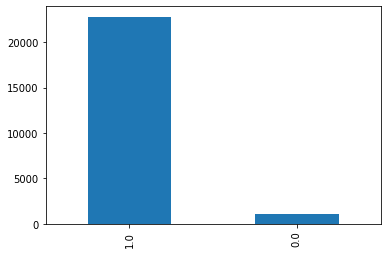

In [44]:
from matplotlib import *
import matplotlib.pyplot as plt
train.MULTIPLE_OFFENSE.value_counts().plot(kind="bar")

In [45]:
idx = features = merged.columns.values[0:17]
for df in [merged]:
    df['sum'] = df[idx].sum(axis=1)  
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)

In [46]:
df.head()

,DATE,INCIDENT_ID,MULTIPLE_OFFENSE,X_1,X_10,X_11,X_12,X_13,X_14,X_15,...,X_6,X_7,X_8,X_9,sum,max,mean,std,skew,kurt
0,04-JUL-04,CR_102659,0.0,0,1,174,1.0,92,29,36,...,5,6,1,6,418.0,174.0,27.866667,47.621824,2.461261,6.426920
1,18-JUL-17,CR_189752,1.0,1,1,236,1.0,103,142,34,...,11,17,1,6,622.0,236.0,41.466667,68.131036,2.109187,4.233544
2,15-MAR-17,CR_184637,1.0,0,1,174,1.0,110,93,34,...,1,0,2,3,430.0,174.0,28.666667,53.391635,1.980445,3.166691
3,13-FEB-09,CR_139071,1.0,0,1,249,1.0,72,29,34,...,7,1,1,6,464.0,249.0,30.933333,63.808269,3.239211,11.284662
4,13-APR-05,CR_109335,1.0,0,1,174,0.0,112,29,43,...,8,3,0,5,439.0,174.0,29.266667,49.896273,2.262283,4.936534


In [47]:
train = merged.iloc[:len(train)]
X = train
train.head()

,DATE,INCIDENT_ID,MULTIPLE_OFFENSE,X_1,X_10,X_11,X_12,X_13,X_14,X_15,...,X_6,X_7,X_8,X_9,sum,max,mean,std,skew,kurt
0,04-JUL-04,CR_102659,0.0,0,1,174,1.0,92,29,36,...,5,6,1,6,418.0,174.0,27.866667,47.621824,2.461261,6.426920
1,18-JUL-17,CR_189752,1.0,1,1,236,1.0,103,142,34,...,11,17,1,6,622.0,236.0,41.466667,68.131036,2.109187,4.233544
2,15-MAR-17,CR_184637,1.0,0,1,174,1.0,110,93,34,...,1,0,2,3,430.0,174.0,28.666667,53.391635,1.980445,3.166691
3,13-FEB-09,CR_139071,1.0,0,1,249,1.0,72,29,34,...,7,1,1,6,464.0,249.0,30.933333,63.808269,3.239211,11.284662
4,13-APR-05,CR_109335,1.0,0,1,174,0.0,112,29,43,...,8,3,0,5,439.0,174.0,29.266667,49.896273,2.262283,4.936534


In [48]:
test = merged.iloc[len(train):]
test.head()

,DATE,INCIDENT_ID,MULTIPLE_OFFENSE,X_1,X_10,X_11,X_12,X_13,X_14,X_15,...,X_6,X_7,X_8,X_9,sum,max,mean,std,skew,kurt
0,01-FEB-18,CR_195453,NaN,0,1,174,NaN,72,119,23,...,6,4,0,5,474.0,174.0,36.461538,54.085758,1.829582,2.759173
1,05-MAR-04,CR_103520,NaN,0,1,316,0.0,12,29,34,...,7,1,4,6,496.0,316.0,35.428571,82.449718,3.486586,12.597067
2,27-JAN-18,CR_196089,NaN,0,1,316,1.0,72,0,34,...,2,7,3,0,511.0,316.0,36.500000,83.153010,3.358914,11.816214
3,18-AUG-06,CR_112195,NaN,7,1,174,1.0,112,87,34,...,9,8,0,5,446.0,174.0,31.857143,53.765670,1.921840,2.972539
4,31-OCT-11,CR_149832,NaN,0,1,174,0.0,112,93,43,...,2,7,1,5,458.0,174.0,32.714286,54.463013,1.824188,2.541538


In [49]:
test2=test.drop(["MULTIPLE_OFFENSE","INCIDENT_ID","DATE"],1)

In [50]:
features=train.drop(["INCIDENT_ID","MULTIPLE_OFFENSE","DATE"],1)
target=train["MULTIPLE_OFFENSE"]

In [51]:
features.head()

,X_1,X_10,X_11,X_12,X_13,X_14,X_15,X_2,X_3,X_4,...,X_6,X_7,X_8,X_9,sum,max,mean,std,skew,kurt
0,0,1,174,1.0,92,29,36,36,34,2,...,5,6,1,6,418.0,174.0,27.866667,47.621824,2.461261,6.426920
1,1,1,236,1.0,103,142,34,37,37,0,...,11,17,1,6,622.0,236.0,41.466667,68.131036,2.109187,4.233544
2,0,1,174,1.0,110,93,34,3,2,3,...,1,0,2,3,430.0,174.0,28.666667,53.391635,1.980445,3.166691
3,0,1,249,1.0,72,29,34,33,32,2,...,7,1,1,6,464.0,249.0,30.933333,63.808269,3.239211,11.284662
4,0,1,174,0.0,112,29,43,33,32,2,...,8,3,0,5,439.0,174.0,29.266667,49.896273,2.262283,4.936534


In [52]:
features.isnull().sum()

X_1     0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
sum     0
max     0
mean    0
std     0
skew    0
kurt    0
dtype: int64

In [53]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(features)
features = scaler.transform(features)
test2 = scaler.transform(test2)

In [54]:
features=pd.DataFrame(features)
test2=pd.DataFrame(test2)

In [55]:

import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))


[ 5. 10.]


In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 100)
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5,  
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(features,target);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    5.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.6s finished


In [58]:

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.33,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 12,
    'tree_learner': 'serial',
    'objective': 'binary',
    'verbosity': 1
}

In [60]:
#!pip3 install lightgbm

In [61]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [62]:

num_round = 100000
folds = StratifiedKFold(n_splits=15, shuffle=False, random_state=100)
oof = np.zeros(len(features))
predictions = np.zeros(len(test2))

In [63]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(features.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(features.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(features.iloc[val_idx], label=target.iloc[val_idx])
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 2500)
    oof[val_idx] = clf.predict(features.iloc[val_idx], num_iteration=clf.best_iteration)
    predictions += clf.predict(test2, num_iteration=clf.best_iteration) / folds.n_splits
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 2500 rounds
[1000]	training's auc: 0.99852	valid_1's auc: 0.995559
[2000]	training's auc: 0.999596	valid_1's auc: 0.996217
[3000]	training's auc: 0.999785	valid_1's auc: 0.996784
[4000]	training's auc: 0.999853	valid_1's auc: 0.996875
[5000]	training's auc: 0.999882	valid_1's auc: 0.997113
[6000]	training's auc: 0.999898	valid_1's auc: 0.997167
[7000]	training's auc: 0.99991	valid_1's auc: 0.997186
[8000]	training's auc: 0.99992	valid_1's auc: 0.997177
Early stopping, best iteration is:
[5673]	training's auc: 0.999895	valid_1's auc: 0.997231
Fold 1
Training until validation scores don't improve for 2500 rounds
[1000]	training's auc: 0.998146	valid_1's auc: 0.996857
[2000]	training's auc: 0.999385	valid_1's auc: 0.998766
[3000]	training's auc: 0.999632	valid_1's auc: 0.999342
[4000]	training's auc: 0.999725	valid_1's auc: 0.999543
[5000]	training's auc: 0.999769	valid_1's auc: 0.999644
[6000]	training's auc: 0.999793	valid_1's au

[11000]	training's auc: 0.999827	valid_1's auc: 0.99987
[12000]	training's auc: 0.999837	valid_1's auc: 0.999879
[13000]	training's auc: 0.999838	valid_1's auc: 0.999898
Early stopping, best iteration is:
[11289]	training's auc: 0.999833	valid_1's auc: 0.999898
Fold 13
Training until validation scores don't improve for 2500 rounds
[1000]	training's auc: 0.998308	valid_1's auc: 0.997589
[2000]	training's auc: 0.999372	valid_1's auc: 0.99923
[3000]	training's auc: 0.999617	valid_1's auc: 0.999666
[4000]	training's auc: 0.999696	valid_1's auc: 0.999805
[5000]	training's auc: 0.999748	valid_1's auc: 0.999879
[6000]	training's auc: 0.999772	valid_1's auc: 0.999944
[7000]	training's auc: 0.99979	valid_1's auc: 0.999954
[8000]	training's auc: 0.999804	valid_1's auc: 0.999963
[9000]	training's auc: 0.999822	valid_1's auc: 0.999981
[10000]	training's auc: 0.999827	valid_1's auc: 0.999991
[11000]	training's auc: 0.999831	valid_1's auc: 0.999991
[12000]	training's auc: 0.999843	valid_1's auc: 0.9

In [ ]:
INCIDENT_ID	MULTIPLE_OFFENSE


In [67]:
submission = pd.DataFrame({"INCIDENT_ID": test.INCIDENT_ID.values})
submission["MULTIPLE_OFFENSE1"] = predictions
#submission.to_csv("submission.csv", index=False)

In [68]:
submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE1
0,CR_195453,0.998614
1,CR_103520,0.999928
2,CR_196089,0.999783
3,CR_112195,0.998977
4,CR_149832,0.999870


In [116]:
def chang(dff):
    if(dff["MULTIPLE_OFFENSE1"]>0.87):
        return(1)
    else:
        return(0)

In [117]:
submission["MULTIPLE_OFFENSE"]=submission.apply(chang,axis=1)

In [118]:
submission["MULTIPLE_OFFENSE"].value_counts()

1    15067
0      836
Name: MULTIPLE_OFFENSE, dtype: int64

In [119]:
sub=submission[["INCIDENT_ID","MULTIPLE_OFFENSE"]]

In [120]:
sub.to_csv("submission10.csv", index=False)